# Adaboost
For this exercise you will implement AdaBoost from scratch and applied it to a spam dataset. You will be classifying data into spam and not spam. You can call DecisionTreeClassifier from sklearn to learn your base classifiers.

Here is how you train a decision tree classifier with weights.

`
h = DecisionTreeClassifier(max_depth=1, random_state=0)
h.fit(X, Y, sample_weight=w)
`

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
# accuracy computation
def accuracy(y, pred):
    return np.sum(y == pred) / float(len(y)) 

In [3]:
import pandas as pd

In [4]:
def parse_spambase_data(filename):
    """ Given a filename return X and Y numpy arrays

    X is of size number of rows x num_features
    Y is an array of size the number of rows
    Y is the last element of each row. (Convert 0 to -1)
    """
    # YOUR CODE HERE
    df = pd.read_csv("./"+filename, header=None)
    df.iloc[:,-1:] = df.iloc[:,-1:].replace(0,float(-1))
    df.iloc[:,-1:] = df.iloc[:,-1:].replace(1,float(1))
    X = np.array(df.iloc[:,0:-1])
    Y = np.array(df.iloc[:,-1:])
    return X, Y

In [5]:
y_test = np.array([1., -1., 1., 1., -1., -1., 1., 1., 1., -1.])
X, Y = parse_spambase_data("tiny.spam.train")
for i in range(len(y_test)): assert(y_test[i] == Y[i])
n, m = X.shape
assert(n == 10)
assert(m == 57)

In [6]:
def adaboost(X, y, num_iter):
    """Given an numpy matrix X, a array y and num_iter return trees and weights 
   
    Input: X, y, num_iter
    Outputs: array of trees from DecisionTreeClassifier
             trees_weights array of floats
    Assumes y is {-1, 1}
    """
    trees = []
    trees_weights = [] 
    N, _ = X.shape
    d = np.ones(N) / N
    # YOUR CODE HERE
    epsilon = 0.000000000000001
    for i in range(num_iter):
        # Train a simple decision stump
        tree = DecisionTreeClassifier(max_depth=1, random_state=0)
        tree.fit(X, y, sample_weight=d)
        # Compute weighted error
        compare = np.not_equal(np.array(tree.predict(X)).reshape((N,1)), y.reshape((N,1)))
        weighted_error = np.dot(d.reshape((1,N)),compare)/np.sum(d)
        # Compute tree weight
        tree_weight = np.log((1-weighted_error+epsilon)/(weighted_error+epsilon))
        trees.append(tree)
        trees_weights.append(tree_weight[0][0])
        # Update the weights
        compare = compare.astype(float)
        compare[compare == 1.] = np.exp(tree_weight[0][0])
        compare[compare == 0.] = 1
        d = np.multiply(d.reshape((N,1)), compare).reshape((N,))
        i += 1
    return trees, trees_weights

In [7]:
X, Y = parse_spambase_data("tiny.spam.train")
trees, weights = adaboost(X, Y, 2)
assert(len(trees) == 2)
assert(len(weights) == 2)
assert(isinstance(trees[0], DecisionTreeClassifier))

In [8]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
h = trees[0]
pred = h.predict(x)
for i in range(len(y)): assert(pred[i] == y[i])

In [9]:
def adaboost_predict(X, trees, trees_weights):
    """Given X, trees and weights predict Y
    """
    # X input, y output
    N, _ =  X.shape
    y = np.zeros(N)
    # YOUR CODE HERE
    for i in range(len(trees_weights)):
        y += trees_weights[i] * trees[i].predict(X)
    return np.sign(y).reshape((N,1))

In [10]:
x = np.array([[0, -1], [1, 0], [-1, 0]])
y = np.array([-1, 1, 1])
trees, weights = adaboost(x, y, 1)
pred = adaboost_predict(x, trees, weights)
for i in range(len(y)):
    assert(pred[i] == y[i])

In [11]:
X, Y = parse_spambase_data("spambase.train")
X_test, Y_test = parse_spambase_data("spambase.test")
trees, trees_weights = adaboost(X, Y, 10)
Yhat = adaboost_predict(X, trees, trees_weights)
Yhat_test = adaboost_predict(X_test, trees, trees_weights)
    
acc_test = accuracy(Y_test, Yhat_test)
acc_train = accuracy(Y, Yhat)
print("Train Accuracy %.4f" % acc_train)
print("Test Accuracy %.4f" % acc_test)
assert(np.around(acc_train, decimals=4)==0.9111)
assert(np.around(acc_test, decimals=4)==0.9190)

Train Accuracy 0.9111
Test Accuracy 0.9190


## 2. Find best num_iter

In [14]:
from sklearn.model_selection import train_test_split

In [78]:
X, Y = parse_spambase_data("spambase.train")
X_test, Y_test = parse_spambase_data("spambase.test")

In [18]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y, test_size=0.2)
print(X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape)

(2880, 57) (720, 57) (2880, 1) (720, 1)


In [28]:
errors_vld = []
errors_trn = []
for i in range(1, 2001):
    trees, trees_weights = adaboost(X_train, Y_train, i)
    Yhat_train = adaboost_predict(X_train, trees, trees_weights)
    Yhat_valid = adaboost_predict(X_valid, trees, trees_weights)
    err_valid = 1-accuracy(Y_valid, Yhat_valid)
    err_train = 1-accuracy(Y_train, Yhat_train)
    errors_vld.append(err_valid)
    errors_trn.append(err_train)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


In [30]:
# Best validation accuracy
1 - min(errors_vld)

0.95416666666666672

In [36]:
# The best value of num_iter
errors_vld_array = np.array(errors_vld)
np.argmin(errors_vld_array)

266

In [64]:
def plot_error_rate(er_train, er_test):
    import matplotlib.pyplot as plt
    %matplotlib inline
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Validation']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,2001,250))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

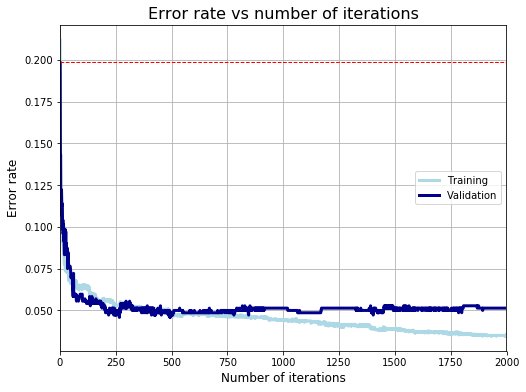

In [65]:
plot_error_rate(errors_trn, errors_vld)

In [54]:
print(1 - errors_vld[266])
print(1 - errors_trn[266])

0.954166666667
0.946527777778


When numTrees = 266, validation accuracy is the highest and has a value of 0.9542. Corresponding train accuracy is 0.9465.

In [79]:
trees, trees_weights = adaboost(X, Y, 266)
Yhat_test = adaboost_predict(X_test, trees, trees_weights)
err_test = 1-accuracy(Y_test, Yhat_test)

In [80]:
print(1-err_test)

0.952


Using the model above, test accuracy is 0.952.

## 3. Compare with XGBoost

### Gridsearch hyperparameters

In [41]:
import xgboost as xgb

In [42]:
Y[Y==-1]=0
dcv = xgb.DMatrix(X, label=Y)

In [49]:
params = {
    'max_depth':7,
    'min_child_weight': 5,
    'eta':.1,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'objective':'binary:logistic',
    'eval_metric':'error'
}


In [50]:
gridsearch_params = [
    (max_depth, min_child_weight, subsample, colsample, eta)
    for max_depth in range(7,9)
    for min_child_weight in range(5,7)
    for subsample in [0.5, 0.7]
    for colsample in [0.5, 0.7]
    for eta in [.1, .05]
]

In [59]:
min_error = float("Inf")
best_params = None
for max_depth, min_child_weight, subsample, colsample, eta in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}, subsample={}, colsample={}, eta={}".format(
                             max_depth,
                             min_child_weight,
                             subsample,
                             colsample,
                             eta))

    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    params['eta'] = eta

    # Run CV
    cv_results = xgb.cv(
        params,
        dcv,
        num_boost_round=200,
        seed=42,
        nfold=5,
        metrics={'error'},
        early_stopping_rounds=50
    )

    # Update best error
    mean_error = cv_results['test-error-mean'].min()
    boost_rounds = cv_results['test-error-mean'].argmin()
    print("\terror {} for {} rounds".format(mean_error, boost_rounds))
    if mean_error < min_error:
        min_error = mean_error
        best_params = [max_depth,min_child_weight,subsample,colsample,eta]

CV with max_depth=7, min_child_weight=5, subsample=0.5, colsample=0.5, eta=0.1
	error 0.053611 for 94 rounds
CV with max_depth=7, min_child_weight=5, subsample=0.5, colsample=0.5, eta=0.05
	error 0.0527778 for 199 rounds
CV with max_depth=7, min_child_weight=5, subsample=0.5, colsample=0.7, eta=0.1
	error 0.0552778 for 81 rounds
CV with max_depth=7, min_child_weight=5, subsample=0.5, colsample=0.7, eta=0.05
	error 0.0516668 for 176 rounds
CV with max_depth=7, min_child_weight=5, subsample=0.7, colsample=0.5, eta=0.1
	error 0.0511112 for 78 rounds
CV with max_depth=7, min_child_weight=5, subsample=0.7, colsample=0.5, eta=0.05
	error 0.0508332 for 174 rounds
CV with max_depth=7, min_child_weight=5, subsample=0.7, colsample=0.7, eta=0.1
	error 0.052778000000000005 for 93 rounds
CV with max_depth=7, min_child_weight=5, subsample=0.7, colsample=0.7, eta=0.05
	error 0.0502776 for 188 rounds
CV with max_depth=7, min_child_weight=6, subsample=0.5, colsample=0.5, eta=0.1
	error 0.0547222 for 10

In [62]:
# Best hyperparameters
print(best_params, min_error)

[7, 5, 0.7, 0.7, 0.05] 0.0502776


In [63]:
# Best cross-validation mean accuracy
print(1-min_error)

0.9497224


### Fit model with optimized hyperparameters

In [70]:
params = {
    'max_depth':7,
    'min_child_weight': 5,
    'eta':0.05,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective':'binary:logistic',
    'eval_metric':'error'
}

In [93]:
Y_test[Y_test==-1]=0
dtest = xgb.DMatrix(X_test, label=Y_test)
watchlist = [(dcv, 'train'), (dtest, 'test')]

In [94]:
gbm = xgb.train(params, dcv, 200, watchlist, early_stopping_rounds=50,
                maximize=False, verbose_eval=10)

[0]	train-error:0.106667	test-error:0.112
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 50 rounds.
[10]	train-error:0.061944	test-error:0.073
[20]	train-error:0.054167	test-error:0.061
[30]	train-error:0.051667	test-error:0.056
[40]	train-error:0.049444	test-error:0.053
[50]	train-error:0.047778	test-error:0.05
[60]	train-error:0.046389	test-error:0.046
[70]	train-error:0.044444	test-error:0.046
[80]	train-error:0.038889	test-error:0.044
[90]	train-error:0.038333	test-error:0.043
[100]	train-error:0.036111	test-error:0.041
[110]	train-error:0.035278	test-error:0.041
[120]	train-error:0.033056	test-error:0.04
[130]	train-error:0.031944	test-error:0.04
[140]	train-error:0.031111	test-error:0.038
[150]	train-error:0.030278	test-error:0.038
[160]	train-error:0.028889	test-error:0.037
[170]	train-error:0.028889	test-error:0.037
[180]	train-error:0.026944	test-error:0.038
[190]	train-error:0.024722	test-e

In [100]:
print(1-0.024722, 1-0.037)

0.975278 0.963


With the best hyperparameters, we retrain the model on the whole training set. The training accuracy is 0.9753, and the test accuracy is 0.963. So XGBoost has a better result than AdaBoost.